# Project CS - Shallow water model

## Convergences codes

In [1]:
# Convergence dt

"""
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))

dx   = L/len(x)

# ---------------------------------------------------------------

N_dt = 5 # Number of dt to be tested
dt   = np.array([0.001*k for k in range(1, N_dt)]) # nu = cflnum so we might ensure cflnum <= 1

for i in range(np.size(axes,0)):

    # LW
        
    (Q, t_final, h_final) = q_MC(x, dx, t0, T, dt[i], u_init, g)    
    axes[i].plot(x, Q[-1], label=f'LW - dt = {dt[i]:.3f}, CFL = {dt[i]/dx:.2f}')

    axes[i].set_title(f'Convergence - time step dt - dx={dx}')
    axes[i].set_xlabel('x [m]')
    axes[i].set_ylabel("height [m]")
        
    axes[i].grid('True')
    axes[i].legend(loc=3)
        
    # -------------------------------------------------------------------------------
        
    # MC
        
    (Q, t_final, h_final) = q_MC(x, dx, t0, T, dt[i], u_init, g)    
    axes[i].plot(x, Q[-1], label=f'MC - dt = {dt[i]:.3f}, CFL = {dt[i]/dx:.2f}')

    axes[i].set_title(f'Convergence - time step dt - dx={dx}')
    axes[i].set_xlabel('x [m]')
    axes[i].set_ylabel("height [m]")
        
    axes[i].grid('True')
    axes[i].legend(loc=3)
        
plt.tight_layout()
"""

'\nfigure, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))\n\ndx   = L/len(x)\n\n# ---------------------------------------------------------------\n\nN_dt = 5 # Number of dt to be tested\ndt   = np.array([0.001*k for k in range(1, N_dt)]) # nu = cflnum so we might ensure cflnum <= 1\n\nfor i in range(np.size(axes,0)):\n\n    # LW\n        \n    (Q, t_final, h_final) = q_MC(x, dx, t0, T, dt[i], u_init, g)    \n    axes[i].plot(x, Q[-1], label=f\'LW - dt = {dt[i]:.3f}, CFL = {dt[i]/dx:.2f}\')\n\n    axes[i].set_title(f\'Convergence - time step dt - dx={dx}\')\n    axes[i].set_xlabel(\'x [m]\')\n    axes[i].set_ylabel("height [m]")\n        \n    axes[i].grid(\'True\')\n    axes[i].legend(loc=3)\n        \n    # -------------------------------------------------------------------------------\n        \n    # MC\n        \n    (Q, t_final, h_final) = q_MC(x, dx, t0, T, dt[i], u_init, g)    \n    axes[i].plot(x, Q[-1], label=f\'MC - dt = {dt[i]:.3f}, CFL = {dt[i]/dx:.2f}\')\n\n    axe

In [2]:
# Convergence dx

"""
figure, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 12))

dt = 0.01

# ---------------------------------------------------------------

N_dx = 7 # Number of dt to be tested
CFL  = np.array([0.015*k for k in range(1, N_dx)]) # nu = cflnum so we might ensure cflnum <= 1

dx   = dt/CFL

for i in range(np.size(axes,0)):

        # LW
        
        (Q, t_final, h_final) = q_MC(x, dx[i], t0, T, dt, u_init, g)    
        axes[i].plot(x, Q[-1], label=f'LW - dx = {dx[i]:.3f}, CFL = {dt/dx[i]:.2f}')

        axes[i].set_title(f'Convergence - space step dx - dt={dt}')
        axes[i].set_xlabel('x [m]')
        axes[i].set_ylabel("height [m]")
        
        axes[i].grid('True')
        axes[i].legend(loc=3)
        
        # -------------------------------------------------------------------------------
        
        # MC
        
        (Q, t_final, h_final) = q_MC(x, dx[i], t0, T, dt, u_init, g)    
        axes[i].plot(x, Q[-1], '--', label=f'MC - dx = {dx[i]:.3f}, CFL = {dt/dx[i]:.2f}')

        axes[i].set_title(f'Convergence - space step dx - dt={dt}')
        axes[i].set_xlabel('x [m]')
        axes[i].set_ylabel("height [m]")
        
        axes[i].grid('True')
        axes[i].legend(loc=3)
        
plt.tight_layout()
"""

'\nfigure, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 12))\n\ndt = 0.01\n\n# ---------------------------------------------------------------\n\nN_dx = 7 # Number of dt to be tested\nCFL  = np.array([0.015*k for k in range(1, N_dx)]) # nu = cflnum so we might ensure cflnum <= 1\n\ndx   = dt/CFL\n\nfor i in range(np.size(axes,0)):\n\n        # LW\n        \n        (Q, t_final, h_final) = q_MC(x, dx[i], t0, T, dt, u_init, g)    \n        axes[i].plot(x, Q[-1], label=f\'LW - dx = {dx[i]:.3f}, CFL = {dt/dx[i]:.2f}\')\n\n        axes[i].set_title(f\'Convergence - space step dx - dt={dt}\')\n        axes[i].set_xlabel(\'x [m]\')\n        axes[i].set_ylabel("height [m]")\n        \n        axes[i].grid(\'True\')\n        axes[i].legend(loc=3)\n        \n        # -------------------------------------------------------------------------------\n        \n        # MC\n        \n        (Q, t_final, h_final) = q_MC(x, dx[i], t0, T, dt, u_init, g)    \n        axes[i].plot(x, Q[-1], \'--\

We consider a fluid flowing in one dimension. 

When the fluid deepness of a river or lagoon isn't too big we can consider the fluid is flowing in one dimension, the main direction ($x$ in a 1D model). Starting from the Navier-Stokes equation we can write a reduced model, called **Shallow Water** describing the fluid flow in terms of the fluid heigh $h$ and the flux $q$. The variable $q$ is $uh$ being $u$ the averaged velocity in the $y$ direction, $u(x,t) = { 1 \over h} \int_h u(x,y,t) dy$. 

We have then two variables, depending on time and space, $h = h(x,t)$; $q=q(x,t)$ and we can write the **differential conservation law** of mass and momentum as

$$\dfrac{\partial h}{\partial t} +  \dfrac{\partial q}{\partial x} = 0$$

$$\dfrac{\partial q}{\partial t} +  \partial \dfrac{ (q^2/h + 1/2 g h^2)}{\partial x} = S$$

where $g$ stand by gravity and $S$ is a source term which could model friction, Coriolis forces, surface tension, or the wind over the free surface $h$. The system can be expressed as

$$\dfrac{\partial U}{\partial t} +  \dfrac{\partial F(U)}{\partial x} = S$$

with $F(U)$ the flux and $U = (h,q)^T$ the conserved variables. 

## Work to do

We want to compute the Shallow Water equation using a finite differences approach.

The configuration is the following, a recipient of length $L$ and a typical water height $h$ is perturbed (see Figures for two different initial conditions) and we want to analyze the fluid dynamics. 

<img src="sw2.png"  width="300" /> <img src="sw1.png"  width="300" />


**Physical Parameters**

- L = 10
- g = 10
- h = 1

**Numerical Parameters**
- dt = 0.01
- N = 100

**Boundary conditions** 
($x=0$ and $x=L$) 

- $q=0$
- ${ d h \over dx } = 0$

**Initial conditions**

- smooth $h_0(x) = 1. + 0.2 x $
- discontinous $h_0(x) = ( x < L./2 : 1.5 ? 1.0 )$

**Typical animation**

<img src="swAnimation.gif"  width="300" />

#### Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
%matplotlib inline

### A - Finite Differences - MacCormak

Implement the MacCormack method.

This second-order finite difference method was introduced by Robert W. MacCormack in 1969. The MacCormack method is the simplest and elegant approach adapted to hyperbolic equations. This is a predictor-corrector approach, i.e. it predicts in the 1st step an intermediate solution $U_i^{*}$ which is then corrected in a 2nd step. 

The algorithm is

* predictor

$$U_i^{*} = U_i^n - {\Delta t \over \Delta x}  ( F_{i+1}^{n} - F_i^{n} )$$

* corrector

$$U_i^{n+1} = { 1 \over 2} (U_i^n + U_i^{*}) - { 1 \over 2}   {\Delta t \over \Delta x}  ( F_{i}^{*} - F_{i-1}^{*} )$$

The MacCormack algorithm does not introduce diffusive errors but it is known to be dispersive  (Gibbs phenomenon) in high gradient regions.

#### Parameters

In [4]:
# Numerical parameters

# --------------------------------------------------------

# space variables

# number of points to define the mesh
N = 200

# length of the mesh
L = 10.

# Spatial grid
x = np.linspace(0, L, N)
dx = L/len(x)

# --------------------------------------------------------

# time data

t0 = 0.
T  = 10.

dt = 0.01

# --------------------------------------------------------

# constant
g = 1.

##### Initial functions

In [5]:
import scipy.sparse as sp

def h0_zero(x):            
    
    """  Zero initial height """
    
    h_0 = np.zeros((len(x)))
    
    return h_0

def h0_one(x):            
    
    """  One initial height """
    
    h_0 = np.ones((len(x)))
    
    return h_0

def h0_slope(x):            
    
    """  Smooth slope """
    
    h_0 = np.zeros((len(x)))
    h_0 = 1. + .1*x
    
    return h_0

def h0_dam(x):    
    
    """  Discontinuous initial condition - dam like shape """
    
    h_0 = np.zeros((len(x)))
    
    L = x[-1]
    
    h_0 = 1. + 0.2*(x<L/2)
    
    return h_0

def h0_bloc(x):    
    
    """  Bloc of water """
    
    h_0 = np.zeros((len(x)))
    
    L = x[-1]
    
    delta_h = .15
    width   = L/3
    
    h_0 = 1. + - delta_h*(x<(L/2-width/2)) - delta_h*(x>(L/2+width/2))
    
    return h_0

# --------------------------------------------------------------------------------------

# ((u(t=0)=0 --> q(t=0) = 0 as u=q/h. We then reshape to fit with concatenation under the form u=[h,q]))

# Initial height
h0 = h0_slope(x)
h0 = h0.reshape(-1, 1)

# Initial flux
q0 = np.zeros((len(x)))
q0 = q0.reshape(-1, 1)

# Concatenation
u_ini = np.append(h0, q0, axis=1)

##### Flux vector - BC

In [6]:
# Smooth IC 

def fill_F(U, g):
    
    """  Fill Flux vector of equations """
    
    F = U.copy()
    
    F[:,0] = U[:,1]
    F[:,1] = U[:,1]**2/U[:,0] + (1/2)*g*U[:,0]**2
    
    return F


def BC(U):
    
    """  Boundary conditions """
    
    # Height
    U[0,0]  = U[1,0]
    U[-1,0] = U[-2,0]
    
    # Flux
    U[0,1]  = 0 #U[1,1]
    U[-1,1] = 0 #U[-2,1] #2*U[-2,1]-U[-3,1]
    
    return

#### Operators

In [7]:
# function as different shearing stress cases

def disp_case(a):
    
    """ Function displacying for the user the detail of chosen case a """
    
    if a==1:
        print("Case continuous flow")

    elif a==2:
        print("Case linear flow")

    elif a==3:
        print("Case Poiseuille flow")

    else:
        print("Wrong number, please check a value")

In [8]:
# function for case n° a

def S_shear_stress(h, q, x, mu, rho, a):
    
    """ Shear stress from Poiseuille flow at bottom """

    # Initialisation friction vector (matrix as h, q)
    tau = np.zeros((len(h), 2))
    
    L = x[-1]
    
    if a==1:
        tau[:,1] = mu*q/h**2

        return tau/rho
    
    elif a==2:
        tau[:,1] = mu*2*q/h**2
          
        return tau/rho  
    
    elif a==3:
        tau[:,1] = mu*3*q/h**2
          
        return tau/rho
    
    else:
        print("Wrong number, please check a value")        


##### MacCormak scheme

In [9]:
# Matrix/Operator version

import scipy.sparse as sp

# --------------------------------------------------------

def diverg_up_op(m):
    
    """ divergence operator """
    
    Div = sp.diags([-1, 1], [0, 1], (m, m)).toarray()
    
    Div[0,1]= 0
    Div[0,0] = Div[-1,-1] = 1
   
    return Div

def diverg_down_op(m):
    
    """ divergence operator """
    
    Div = sp.diags([-1, 1], [-1, 0], (m, m)).toarray()
    
    Div[-1,-2]= 1
    
    return Div
    
## Algo

def q_MC(x, dx, t0, T, dt, u_ini, rho, mu, a):

    """  The MacCormak method """
    
    u      = u_ini.copy();
    u_star = u_ini.copy();
    unew   = u_ini.copy();
    
    h      = [u[:,0].copy()] # h variable
    q      = [u[:,1].copy()] # q variable
    
    BC(u)

    # -------------------------------------------
    
    Div_down = diverg_down_op(len(u[:,0]))
    Div_up   = diverg_up_op(len(u[:,0]))
    
    # -------------------------------------------
    
    npas = int(T/dt)
    t      = t0
    i      = 0
    
    while i < npas:
        
        i += 1
        
        # predictor solution
        S = S_shear_stress(u[:,0], u[:,1], x, mu, rho, a) #np.zeros((len(x), 2)) #
        F  = fill_F(u, g)
        u_star = u - (dt/dx)*Div_up@F + dt*S
        
        # Periodic BCs:
        BC(u_star)
        
        # corrector solution
        S_star = S_shear_stress(u_star[:,0], u_star[:,1], x, mu, rho, a) #np.zeros((len(x), 2)) #
        F_star  = fill_F(u_star, g)
        unew = .5*(u+u_star) - .5*(dt/dx)*Div_down@F_star + dt*S_star
        
        # Periodic BCs:
        BC(unew)

        if (i%30)==0: #We only take some values (every a in i%a)
            h.append(unew[:,0].copy()) # vector containing h(x,T) for each iteration
            q.append(unew[:,1].copy()) # vector containing h(x,T) for each iteration
        
        u = unew.copy()         # vector containing u(x,T)

    return (h, q, t)

#### Results  scheme

In [15]:
# Data
mu  = 0.05
rho = 10**3 #[kg.m-3] water volumic mass

T   = 30.

##### a - approximation speed case

In [16]:
k=1

disp_case(k)

# ---------------------------------------------------------------

(h, q, t_final) = q_MC(x, dx, t0, T, dt, u_ini, rho, mu, k)

print('\nWe check for stability')
print('At final time t = {:.0f} s\n'.format(t_final))
print('H_final(x=L) = {} \n'.format(h[-1][-1:]))
print('Q_final(x=L) = q(x, {:.0f}) = {}'.format(t_final, q[-1][-1:]))

Case continuous flow

We check for stability
At final time t = 0 s

H_final(x=L) = [1.78291573] 

Q_final(x=L) = q(x, 0) = [0.]


##### b - linear speed case

In [17]:
k=2

disp_case(k)

# ---------------------------------------------------------------

(h, q, t_final) = q_MC(x, dx, t0, T, dt, u_ini, rho, mu, k)

print('\nWe check for stability')
print('At final time t = {:.0f} s\n'.format(t_final))
print('H_final(x=L) = %.5f \n' %(h[-1][-1:]))
print('Q_final(x=L) = q(x, {:.0f}) = {}'.format(t_final, q[-1][-1:]))

Case linear flow

We check for stability
At final time t = 0 s

H_final(x=L) = 1.78303 

Q_final(x=L) = q(x, 0) = [0.]


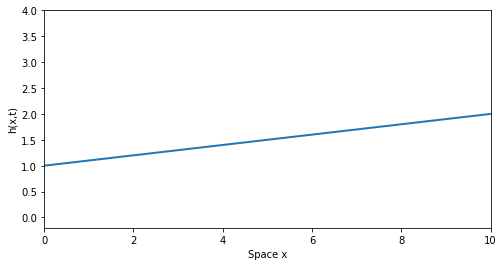

In [18]:
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

n = np.arange(0,np.shape(h)[0]) 

fig   = plt.figure(figsize=(8,4))    # Create an empty figure
ax    = plt.axes()
line, = ax.plot([], [],linewidth=2)  # Create an empty line plot

plt.xlabel('Space x')
plt.ylabel('h(x,t)')

plt.axis((0, 10, -.2, 4))              # Set the bounds of the plot

def plot_q(n):
    line.set_data(x, h[n])  # Replace the line plot with the solution at time t
    
anim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution

#plt.show()
HTML(anim.to_jshtml())

In [14]:
# To compare height with and without shearing term
# run with (h0, q0, t_final) = q_MC(x, dx, t0, T, dt, u_ini, rho, mu, k)
# then run with (h1, q1, t_final) = q_MC(x, dx, t0, T, dt, u_ini, rho, mu, k)

"""
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

n = np.arange(0,np.shape(h)[0]) 

fig   = plt.figure(figsize=(8,4))    # Create an empty figure
ax    = plt.axes()

line1, = ax.plot([], [], 'b-', linewidth=2)  # Line plot for h
#line2, = ax.plot([], [], '--', color='orange', linewidth=2)  # Line plot for B
line2, = ax.plot([], [], 'g--', linewidth=2)  # Line plot for u

plt.xlabel('Space x')
plt.ylabel('h(x,t)')

plt.axis((0, 10, 0, 2.5))              # Set the bounds of the plot

def plot_q(n):
    line1.set_data(x, h0[n])
    line2.set_data(x, h1[n])

    return[line1, line2]

anim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution

plt.legend(['h0', 'h1'], loc=3)

#plt.show()
HTML(anim.to_jshtml())
"""

"\nimport matplotlib.animation as animation\nfrom IPython.display import HTML\n\n#%matplotlib notebook\n\nn = np.arange(0,np.shape(h)[0]) \n\nfig   = plt.figure(figsize=(8,4))    # Create an empty figure\nax    = plt.axes()\n\nline1, = ax.plot([], [], 'b-', linewidth=2)  # Line plot for h\n#line2, = ax.plot([], [], '--', color='orange', linewidth=2)  # Line plot for B\nline2, = ax.plot([], [], 'g--', linewidth=2)  # Line plot for u\n\nplt.xlabel('Space x')\nplt.ylabel('h(x,t)')\n\nplt.axis((0, 10, 0, 2.5))              # Set the bounds of the plot\n\ndef plot_q(n):\n    line1.set_data(x, h0[n])\n    line2.set_data(x, h1[n])\n\n    return[line1, line2]\n\nanim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution\n\nplt.legend(['h0', 'h1'], loc=3)\n\n#plt.show()\nHTML(anim.to_jshtml())\n"